<a href="https://colab.research.google.com/github/nhs000/machine_learning_practice_prj/blob/master/L1_practice_messi_or_ronaldo_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_images_download

In [2]:
!pip install icrawler

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
from icrawler.builtin import GoogleImageCrawler
from IPython.display import Image

np.random.seed(25)
bs = 64


project_root = "~/data/L1/messi_ronaldo/" # because mutiple project share a common data folder
!rm -r "~/data/L1/messi_ronaldo/"
!ls "~/data/L1/messi_ronaldo/"

rm: cannot remove '~/data/L1/messi_ronaldo/': No such file or directory
ls: cannot access '~/data/L1/messi_ronaldo/': No such file or directory


In [0]:
def create_data(dataType, className, keyword, startIdx=0, maxNum=100):
  google_crawler = GoogleImageCrawler(storage={'root_dir': project_root + dataType+'/'+className})
  google_crawler.crawl(keyword=keyword, max_num=maxNum, file_idx_offset=startIdx)
  

In [6]:
create_data('train', 'messi', 'messi face portrait', 0, 100)

2019-08-21 17:38:29,322 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:38:29,323 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:38:29,328 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:38:29,330 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:38:29,334 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:38:29,745 - INFO - parser - parsing result page https://www.google.com/search?q=messi+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:38:29,882 - INFO - downloader - image #1	https://i.pinimg.com/originals/7d/5c/83/7d5c834bc2ffbe69d99149d3a79eedd4.jpg
2019-08-21 17:38:29,904 - INFO - downloader - image #2	https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/affe7079-7209-42a0-b6e9-a3bcdc99d98e/d4w7m2e-91965392-d4c6-46eb-a24c-95820245d6af.jpg?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMj

In [7]:
!ls "~/data/L1/messi_ronaldo/train"

messi


In [8]:

fnames = get_image_files(project_root + "/train/messi")
len(fnames)

81

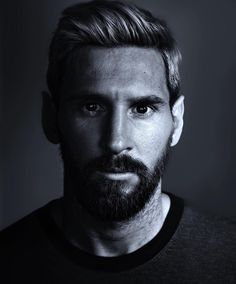

In [9]:
Image(filename=fnames[0].as_posix()) 

In [10]:
create_data('valid', 'messi', 'messi face portrait', 100, 50)

2019-08-21 17:39:20,472 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:39:20,474 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:39:20,479 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:39:20,479 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:39:20,483 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:39:21,038 - INFO - parser - parsing result page https://www.google.com/search?q=messi+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:39:21,170 - INFO - downloader - image #1	https://i.pinimg.com/originals/7d/5c/83/7d5c834bc2ffbe69d99149d3a79eedd4.jpg
2019-08-21 17:39:21,547 - INFO - downloader - image #2	https://sortitoutsi.net/file/image/68411
2019-08-21 17:39:21,559 - INFO - downloader - image #3	https://i.pinimg.com/474x/aa/5e/d8/aa5ed8e447e3f86e90a1e241d536e2d3.jpg
2019-08-21 17:39:22,075 - INFO - downloader - image #4	https://get.wallhere.com/photo/face-model-portrait-singer-blue-hai

In [11]:
create_data('test', 'messi', 'messi face portrait', 150, 50)

2019-08-21 17:39:40,544 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:39:40,546 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:39:40,549 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:39:40,550 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:39:40,557 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:39:41,000 - INFO - parser - parsing result page https://www.google.com/search?q=messi+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:39:41,283 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-21 17:39:41,285 - INFO - parser - thread parser-001 exit
2019-08-21 17:39:41,299 - INFO - downloader - image #1	https://i.pinimg.com/originals/7d/5c/83/7d5c834bc2ffbe69d99149d3a79eedd4.jpg
2019-08-21 17:39:41,622 - INFO - downloader - image #2	https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/affe7079-7209-42a0-b6e9-a3bcdc99d98e/d4w7m2e-91965392-d

In [12]:
create_data('train', 'ronaldo', 'c.ronaldo face portrait', 0, 100)


2019-08-21 17:39:59,604 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-21 17:39:59,605 - INFO - parser - thread parser-001 exit
2019-08-21 17:39:59,627 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:39:59,629 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:39:59,629 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:39:59,630 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:39:59,638 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:40:00,065 - INFO - parser - parsing result page https://www.google.com/search?q=c.ronaldo+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:40:00,200 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0747/3829/products/mHP1969_1024x1024.jpg?v=1511950578
2019-08-21 17:40:00,315 - INFO - downloader - image #2	https://i.pinimg.com/474x/8a/f7/84/8af7846050dd2c6b7693cce05d6ca2cd.jpg
2019-08-21 17:40:00,405 - 

In [13]:
create_data('valid', 'ronaldo', 'c.ronaldo face portrait', 100, 50)


2019-08-21 17:40:34,726 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:40:34,727 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:40:34,731 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:40:34,733 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:40:34,739 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:40:35,141 - INFO - parser - parsing result page https://www.google.com/search?q=c.ronaldo+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:40:35,352 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0747/3829/products/mHP1969_1024x1024.jpg?v=1511950578
2019-08-21 17:40:35,411 - INFO - downloader - image #2	https://i.pinimg.com/474x/8a/f7/84/8af7846050dd2c6b7693cce05d6ca2cd.jpg
2019-08-21 17:40:35,518 - INFO - downloader - image #3	https://images.performgroup.com/di/library/GOAL/b/aa/cristiano-ronaldo-juventus_j4n1kpwsoqj21bammxm13odyb.jpg?t=123025297&quality=100
2019-08-21 17

In [14]:
create_data('test', 'ronaldo', 'c.ronaldo face portrait', 150, 200)

2019-08-21 17:40:47,786 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:40:47,787 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:40:47,789 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:40:47,789 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:40:47,793 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:40:48,256 - INFO - parser - parsing result page https://www.google.com/search?q=c.ronaldo+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:40:48,260 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-21 17:40:48,262 - INFO - parser - thread parser-001 exit
2019-08-21 17:40:48,381 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0747/3829/products/mHP1969_1024x1024.jpg?v=1511950578
2019-08-21 17:40:48,722 - INFO - downloader - image #2	https://i.pinimg.com/474x/8a/f7/84/8af7846050dd2c6b7693cce05d6ca2cd.jpg
2019-08-21 17:40:48,806 - 

In [0]:
# load data
data = ImageDataBunch.from_folder(project_root, size=256)
data = data.normalize(imagenet_stats)

In [16]:
data.classes


['messi', 'ronaldo']

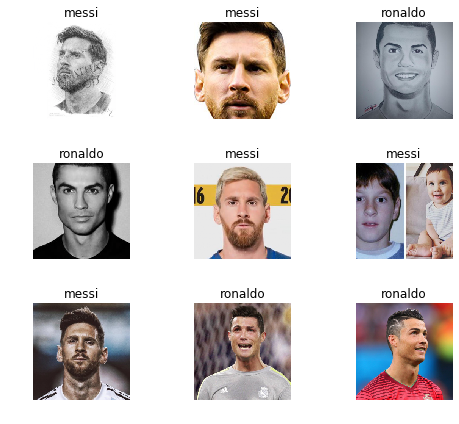

In [17]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.unfreeze()

In [0]:
learn.model


In [21]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.892368,0.586758,0.310000,00:10
1,0.623694,0.257871,0.070000,00:09
2,0.434340,0.118481,0.020000,00:09
3,0.329981,0.071168,0.010000,00:08


In [0]:
learn.save('stage-1')


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

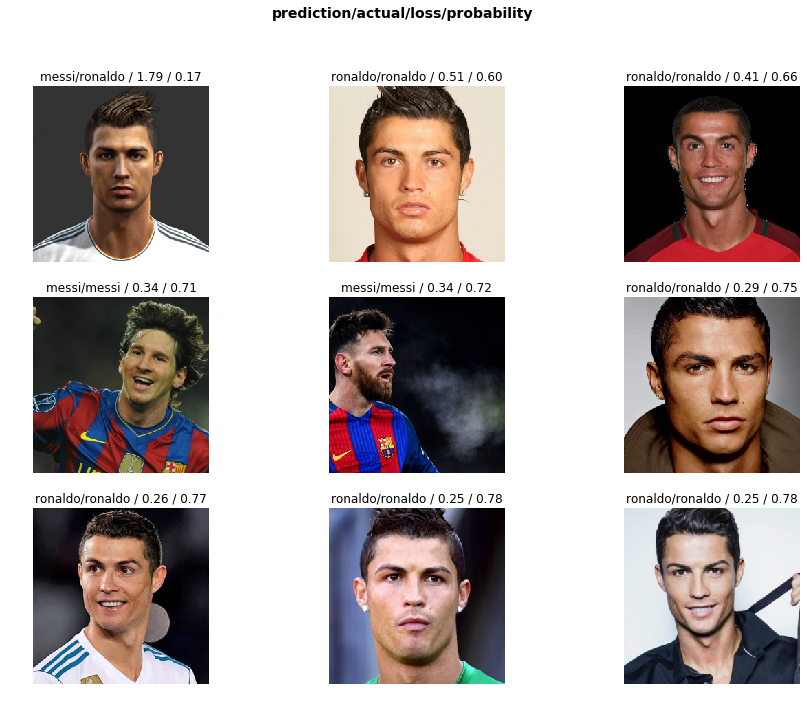

In [24]:
interp.plot_top_losses(9, figsize=(15,11))


In [25]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.024200,0.030853,0.010000,00:09
1,0.049451,0.013842,0.010000,00:09
2,0.035128,0.025030,0.010000,00:09
3,0.029983,0.021451,0.010000,00:09


In [26]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


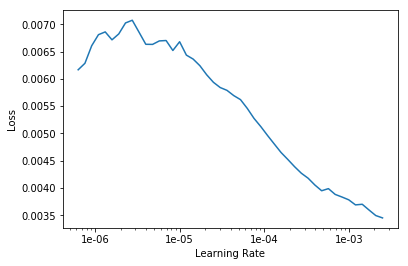

In [27]:
learn.recorder.plot()


In [0]:
# learn.fit_one_cycle(1, max_lr=slice(1e-, 1e-2))


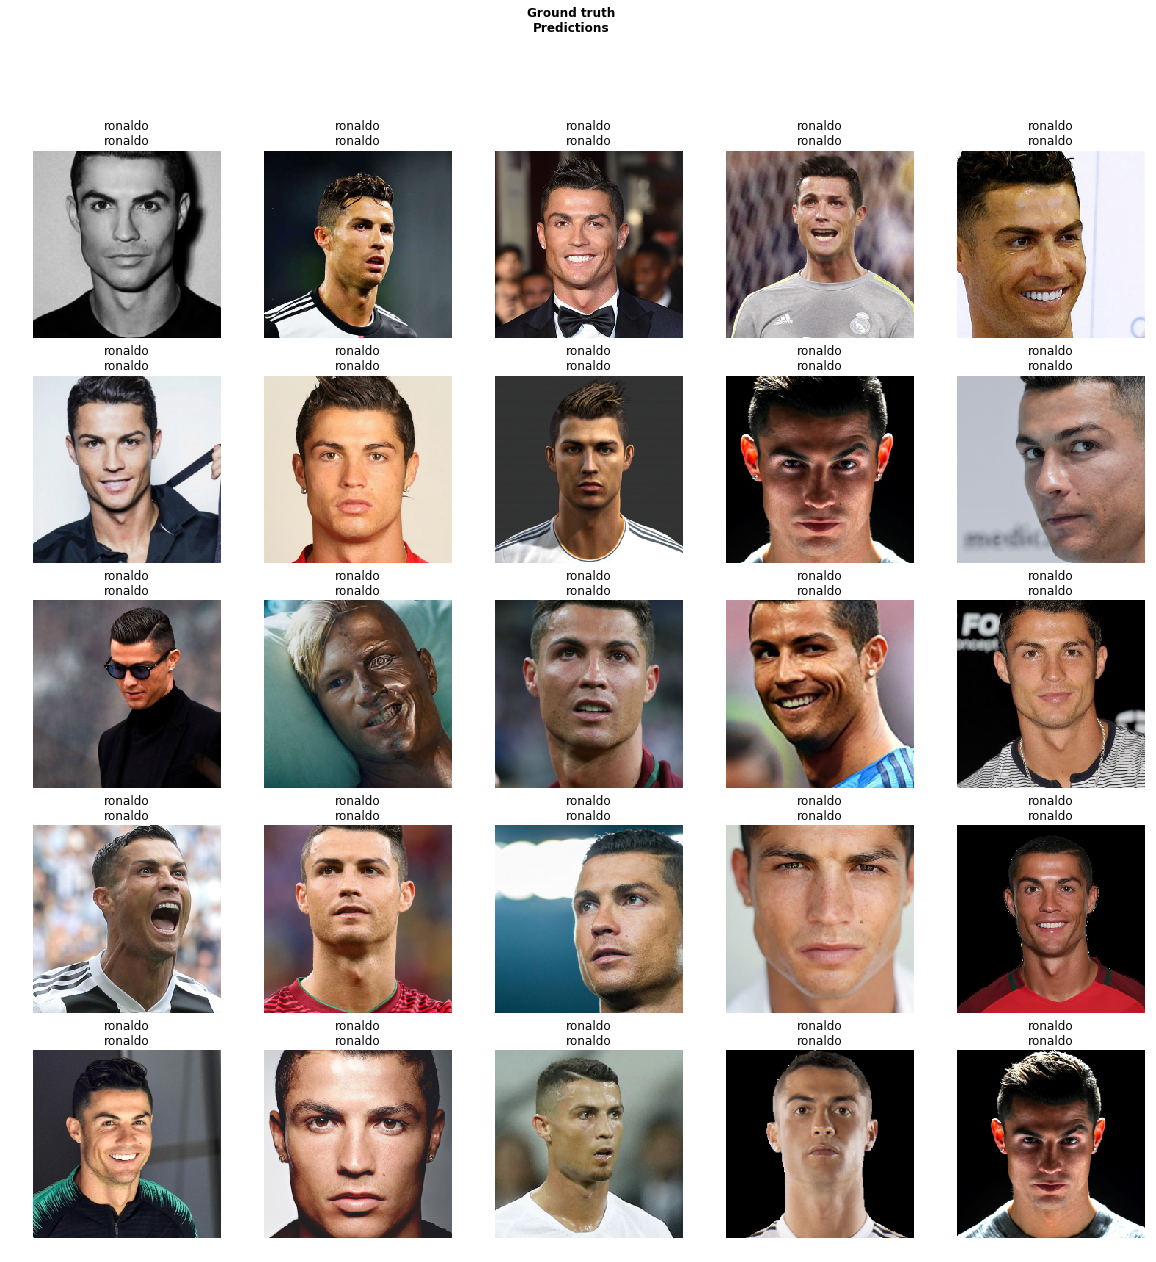

In [28]:
learn.show_results()


In [29]:
interp.most_confused(min_val=2)


[]

In [30]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (173 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
ronaldo,ronaldo,ronaldo,ronaldo,ronaldo
Path: ~/data/L1/messi_ronaldo;

Valid: LabelList (100 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
ronaldo,ronaldo,ronaldo,ronaldo,ronaldo
Path: ~/data/L1/messi_ronaldo;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05

In [31]:
google_crawler = GoogleImageCrawler(storage={'root_dir': project_root + 'test/quanghai'})
google_crawler.crawl(keyword='nguyen quang hai', max_num=1, file_idx_offset=0)

2019-08-21 17:46:14,577 - INFO - icrawler.crawler - start crawling...
2019-08-21 17:46:14,594 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-21 17:46:14,602 - INFO - feeder - thread feeder-001 exit
2019-08-21 17:46:14,602 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-21 17:46:14,619 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-21 17:46:15,141 - INFO - parser - parsing result page https://www.google.com/search?q=nguyen+quang+hai&ijn=0&start=0&tbs=&tbm=isch
2019-08-21 17:46:15,613 - INFO - downloader - image #1	https://upload.wikimedia.org/wikipedia/commons/7/77/Nguy%E1%BB%85n_Quang_H%E1%BA%A3i.jpg
2019-08-21 17:46:17,165 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2019-08-21 17:46:17,166 - INFO - downloader - thread downloader-001 exit
2019-08-21 17:46:17,619 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-21 17:46:17,621 - INFO - 

In [32]:
fnames = get_image_files(project_root + "test/quanghai")
len(fnames)

1

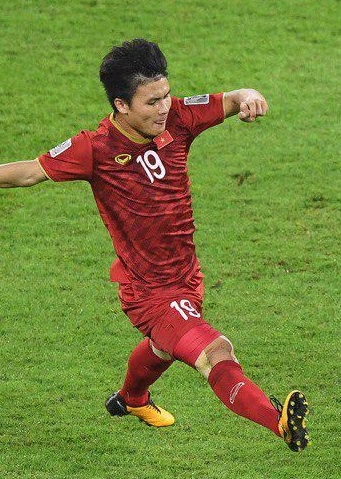

In [33]:
Image(filename=fnames[0].as_posix())

In [34]:
learn.predict(open_image(fnames[0]))

(Category ronaldo, tensor(1), tensor([0.1232, 0.8768]))

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!ls "/content/drive/My Drive"

'Colab Notebooks'   Manikari   ML_practice   Untitled0.ipynb


In [40]:
ggdrive_root = "/content/drive/My Drive/ML_practice/"
!ls "/content/drive/My Drive/ML_practice/"

messi_ronaldo


In [45]:
fnames = get_image_files(ggdrive_root + "messi_ronaldo/")

len(fnames)

2

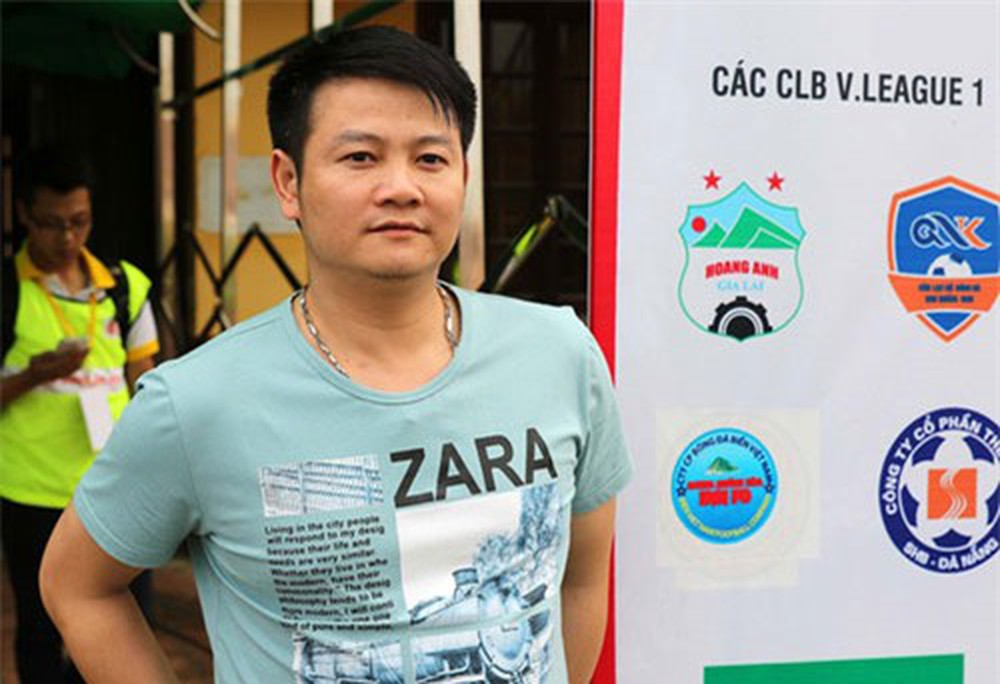

In [46]:
Image(filename=fnames[0].as_posix())

In [43]:
learn.predict(open_image(fnames[0]))

(Category messi, tensor(0), tensor([0.5861, 0.4139]))

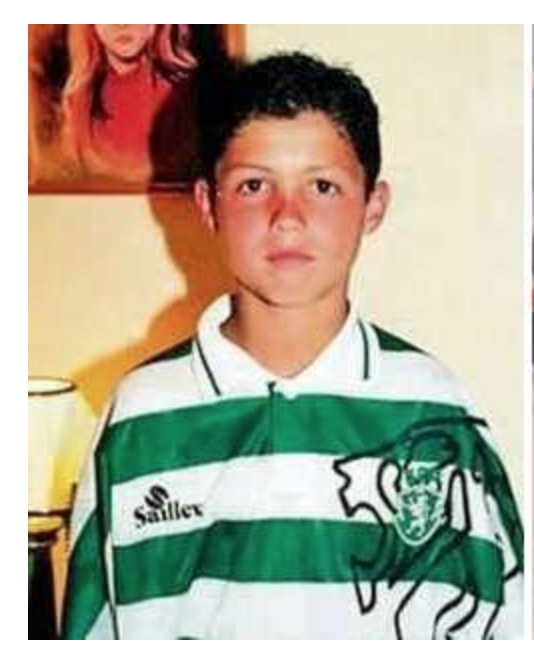

In [47]:
Image(filename=fnames[1].as_posix())

In [48]:
learn.predict(open_image(fnames[1]))

(Category ronaldo, tensor(1), tensor([0.4982, 0.5018]))